## 라이브러리 임포트

In [1]:
# Library import - data preprocessing 
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [2]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
# torch
import torch 

In [4]:
# 평가지표
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [5]:
# visulazation
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [6]:
# font manager
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [7]:
# tqdm
from tqdm import tqdm

In [8]:
# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [9]:
## GPU check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용중인 디바이스:", device)

사용중인 디바이스: cuda


In [10]:
print("CUDA 사용 가능?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("사용 중인 GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU를 사용할 수 없습니다.")

CUDA 사용 가능? True
사용 중인 GPU: NVIDIA GeForce MX450


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
import re

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [17]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 812.7 kB/s eta 0:00:16
     --------------------------------------- 0.1/12.8 MB 901.1 kB/s eta 0:00:15
      -------------------------------------- 0.2/12.8 MB 952.6 kB/s eta 0:00:14
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.3/12.8 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.1 M


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import spacy
nlp = spacy.load("en_core_web_sm")

## Data Load

In [79]:
# 파일 경로
file_path = r"C:\Users\wonny\OneDrive\문서\카카오톡 받은 파일\vlog 8000.csv"

# 데이터 로드
df = pd.read_csv(file_path)

In [80]:
df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,date,keyword
0,T0s63zUvzXU,Bhai I want to eat tasty Pizza 🤣🤣 #minivlog #a...,Real Aman,24,[none],113142353,2624841,0,2075,https://i.ytimg.com/vi/T0s63zUvzXU/default.jpg,11.08,daily vlog
1,5XVoRGhrhZk,DAILY VLOGGERS PARODY 😘 | CARRYMINATI,CarryMinati,23,CarryMinati|Carry|Indian|youtuber|#CarryMinati...,83323024,5415620,0,201992,https://i.ytimg.com/vi/5XVoRGhrhZk/default.jpg,15.07,daily vlog
2,HhM0BYCHL00,Kylie Jenner: A Day in the Life,Kylie Jenner,22,Kylie Jenner|Kylie Skin|Kylie|Kylie Cosmetics,74935115,0,0,100054,https://i.ytimg.com/vi/HhM0BYCHL00/default.jpg,4.06,daily vlog
3,_2wsGPMrzL8,Ghar Par Banaya Soap 🧼💀 | Mini Vlog #shorts #m...,Sirf Shreyansh,22,shorts|viral|funny|comedy|like|subscribe|share...,121355897,1199158,0,1501,https://i.ytimg.com/vi/_2wsGPMrzL8/default.jpg,18.04,daily vlog
4,emdJdmADVXg,Bike Ne Aukaat Dikha Di 💀💀 #shorts #minivlog #...,Sirf Shreyansh,22,10millionviews|My first vlog|Sirf Shreyansh|Yo...,79593128,0,0,837,https://i.ytimg.com/vi/emdJdmADVXg/default.jpg,29.08,daily vlog


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7856 entries, 0 to 7855
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        7856 non-null   object 
 1   title           7856 non-null   object 
 2   channel_title   7856 non-null   object 
 3   category_id     7856 non-null   int64  
 4   tags            7856 non-null   object 
 5   views           7856 non-null   int64  
 6   likes           7856 non-null   int64  
 7   dislikes        7856 non-null   int64  
 8   comment_count   7856 non-null   int64  
 9   thumbnail_link  7856 non-null   object 
 10  date            7856 non-null   float64
 11  keyword         7856 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 736.6+ KB


## Data preprocessing

### function definition

In [82]:
def preprocess_title(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 형태소 분석
    doc = nlp(text)

    # 4. 명사/형용사 + 불용어 제거 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)


In [83]:
def preprocess_description(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거 (알파벳만 남김)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 분석
    doc = nlp(text)

    # 4. 불용어 제거 + 명사/형용사 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)

In [84]:
def count_pos(text):
    if not isinstance(text, str):
        return {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    doc = nlp(text.lower())
    pos_counts = {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1

    return pos_counts

In [85]:
def extract_common_words(row):
    title_words = set(row['cleaned_title'].split())
    desc_words = set(row['cleand_desc'].split())
    common = title_words & desc_words  # 교집합
    return ' '.join(common) if common else ''

### target scaling

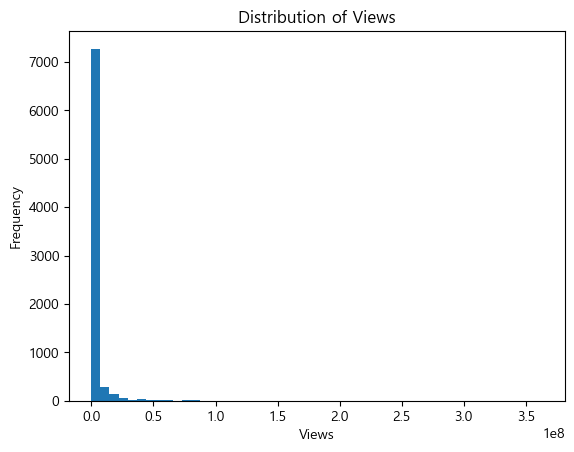

In [86]:
# target 분포 확인 
plt.hist(df['views'], bins=50)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')
plt.show()

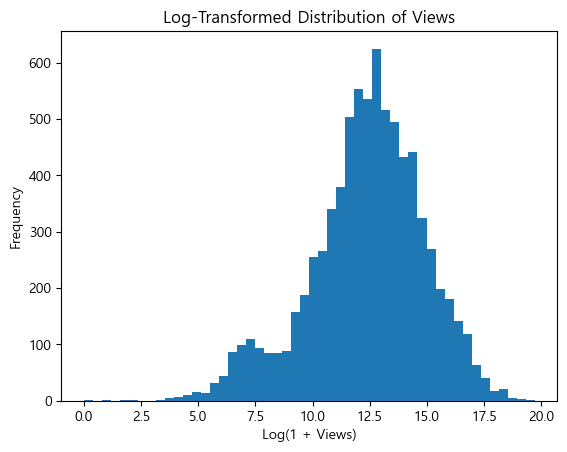

In [87]:
# target log scaling 
df['log_views'] = np.log1p(df['views'])

plt.hist(df['log_views'], bins=50)
plt.xlabel('Log(1 + Views)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Views')
plt.show()

In [88]:
# log_views 열을 표준화
scaler = StandardScaler()
df['log_views_scaled'] = scaler.fit_transform(df[['log_views']])

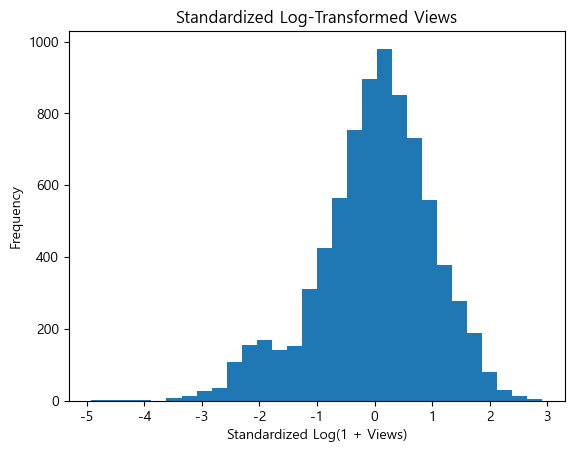

In [89]:
plt.hist(df['log_views_scaled'], bins=30)
plt.title("Standardized Log-Transformed Views")
plt.xlabel("Standardized Log(1 + Views)")
plt.ylabel("Frequency")
plt.show()

### 제목 전처리 

In [90]:
df['cleaned_title'] = df['title'].apply(preprocess_title)

In [91]:
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,date,keyword,log_views,log_views_scaled,cleaned_title
0,T0s63zUvzXU,Bhai I want to eat tasty Pizza 🤣🤣 #minivlog #a...,Real Aman,24,[none],113142353,2624841,0,2075,https://i.ytimg.com/vi/T0s63zUvzXU/default.jpg,11.08,daily vlog,18.544157,2.451513,bhai want eat tasty pizza minivlog amankapariv...
1,5XVoRGhrhZk,DAILY VLOGGERS PARODY 😘 | CARRYMINATI,CarryMinati,23,CarryMinati|Carry|Indian|youtuber|#CarryMinati...,83323024,5415620,0,201992,https://i.ytimg.com/vi/5XVoRGhrhZk/default.jpg,15.07,daily vlog,18.238235,2.329853,daily vlogger parody carryminati
2,HhM0BYCHL00,Kylie Jenner: A Day in the Life,Kylie Jenner,22,Kylie Jenner|Kylie Skin|Kylie|Kylie Cosmetics,74935115,0,0,100054,https://i.ytimg.com/vi/HhM0BYCHL00/default.jpg,4.06,daily vlog,18.132133,2.287658,kylie jenner day life
3,_2wsGPMrzL8,Ghar Par Banaya Soap 🧼💀 | Mini Vlog #shorts #m...,Sirf Shreyansh,22,shorts|viral|funny|comedy|like|subscribe|share...,121355897,1199158,0,1501,https://i.ytimg.com/vi/_2wsGPMrzL8/default.jpg,18.04,daily vlog,18.614238,2.479383,ghar par banaya soap mini vlog short minivlog ...
4,emdJdmADVXg,Bike Ne Aukaat Dikha Di 💀💀 #shorts #minivlog #...,Sirf Shreyansh,22,10millionviews|My first vlog|Sirf Shreyansh|Yo...,79593128,0,0,837,https://i.ytimg.com/vi/emdJdmADVXg/default.jpg,29.08,daily vlog,18.192438,2.311641,bike ne aukaat dikha di short minivlog ashorta...


### 품사별 count

In [92]:
# 각 제목에서 품사별 개수 추출
pos_df = df['title'].apply(count_pos).apply(pd.Series)

# 기존 df와 합치기
df = pd.concat([df, pos_df], axis=1)

In [93]:
df

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,keyword,log_views,log_views_scaled,cleaned_title,NOUN,PROPN,ADJ,VERB,INTJ,NUM
0,T0s63zUvzXU,Bhai I want to eat tasty Pizza 🤣🤣 #minivlog #a...,Real Aman,24,[none],113142353,2624841,0,2075,https://i.ytimg.com/vi/T0s63zUvzXU/default.jpg,...,daily vlog,18.544157,2.451513,bhai want eat tasty pizza minivlog amankapariv...,6,3,1,2,0,0
1,5XVoRGhrhZk,DAILY VLOGGERS PARODY 😘 | CARRYMINATI,CarryMinati,23,CarryMinati|Carry|Indian|youtuber|#CarryMinati...,83323024,5415620,0,201992,https://i.ytimg.com/vi/5XVoRGhrhZk/default.jpg,...,daily vlog,18.238235,2.329853,daily vlogger parody carryminati,2,2,1,0,0,0
2,HhM0BYCHL00,Kylie Jenner: A Day in the Life,Kylie Jenner,22,Kylie Jenner|Kylie Skin|Kylie|Kylie Cosmetics,74935115,0,0,100054,https://i.ytimg.com/vi/HhM0BYCHL00/default.jpg,...,daily vlog,18.132133,2.287658,kylie jenner day life,2,2,0,0,0,0
3,_2wsGPMrzL8,Ghar Par Banaya Soap 🧼💀 | Mini Vlog #shorts #m...,Sirf Shreyansh,22,shorts|viral|funny|comedy|like|subscribe|share...,121355897,1199158,0,1501,https://i.ytimg.com/vi/_2wsGPMrzL8/default.jpg,...,daily vlog,18.614238,2.479383,ghar par banaya soap mini vlog short minivlog ...,10,7,1,0,0,0
4,emdJdmADVXg,Bike Ne Aukaat Dikha Di 💀💀 #shorts #minivlog #...,Sirf Shreyansh,22,10millionviews|My first vlog|Sirf Shreyansh|Yo...,79593128,0,0,837,https://i.ytimg.com/vi/emdJdmADVXg/default.jpg,...,daily vlog,18.192438,2.311641,bike ne aukaat dikha di short minivlog ashorta...,8,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,W1kkfPPBKe0,"spend the day with me 🛀💌🪽 5am pilates class, p...",Muskan Rawat,26,[none],36292,1293,0,79,https://i.ytimg.com/vi/W1kkfPPBKe0/default.jpg,...,productive day vlog,10.499380,-0.747751,spend day pilate class productive healthy habit,6,1,3,1,0,1
7852,phiPTqK8bo0,6am law school morning routine 📖 productive da...,diana vlogs,22,[none],35877,1541,0,128,https://i.ytimg.com/vi/phiPTqK8bo0/default.jpg,...,productive day vlog,10.487880,-0.752325,law school morning routine productive day stud...,6,3,1,2,0,1
7853,HRk9RmDmUQQ,A slow living vlog #dayinmylife #productivity ...,safa with pen,22,Day in my life|Malayalam aesthetic|Morning rou...,42785,2674,0,53,https://i.ytimg.com/vi/HRk9RmDmUQQ/default.jpg,...,productive day vlog,10.663966,-0.682298,slow living vlog dayinmylife productivity slow...,4,1,1,0,0,0
7854,_QtpDbeYRKs,"daily vlog🧸⭐️: productive day , makeover mac ,...",Yourbee,22,[none],34960,1192,0,54,https://i.ytimg.com/vi/_QtpDbeYRKs/default.jpg,...,productive day vlog,10.461988,-0.762621,daily vlog productive day makeover mac clean g...,8,5,3,1,0,0


### 조회수 상위 영상에서 자주 등장하는 단어 확인

--------------------------------------------------------------------------------------------------------

조회수가 높은 영상들에서 자주 등장하는 단어 확인하기 (tf-idf)

In [94]:
# 조회수 기준 상위 영상 vs 하위 영상 비교 
top_df = df[df['views'] >= df['views'].quantile(0.90)].copy()
bottom_df = df[df['views'] >= df['views'].quantile(0.10)].copy()

In [95]:
## tf-idf
# 벡터화 객체 생성
vectorizer = TfidfVectorizer(
    stop_words='english',      # 영어 불용어 제거
    max_features=1000,         # 상위 5000개의 단어만 사용
    ngram_range=(1, 2)         # unigram + bigram 사용
)

In [96]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

In [97]:
# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 30개 단어 보기
print(tfidf_df.head(30))

                word      score
950             vlog  42.260650
798            short  33.536979
727          routine  26.083319
397            korea  24.293533
499         minivlog  23.501004
256             food  21.784447
539          morning  20.616834
197              day  19.380677
409           korean  18.484161
542  morning routine  16.289282
912           travel  16.030180
190        dailyvlog  14.482377
438             life  13.635954
121          camping  13.571193
920       travelvlog  10.441473
29              asmr  10.415435
186            daily  10.175982
291             grwm  10.137300
363            japan   9.988701
575            night   9.911932
270         foodvlog   9.882805
826         skincare   9.360914
265           foodie   8.925899
200         day life   8.915087
922            trend   8.909224
220              eat   8.777854
322             hour   8.590001
137        challenge   8.528234
211              dog   8.439233
187       daily vlog   8.047160


-----------------------------------------------------------------------------------------------------------

전체 데이터에서 출현 빈도가 높은 단어들 확인하기 (countvectorizer) 

In [98]:
#CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vectorizer.fit_transform(top_df['cleaned_title']) 

# 단어별 빈도 계산
word_counts = X_counts.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# 정리
count_df = pd.DataFrame({'word': words, 'count': word_counts})
count_df = count_df.sort_values('count', ascending=False)

In [99]:
count_df[count_df['count']>50]

,word,count
949,vlog,250
842,short,168
685,minivlog,135
811,routine,113
246,food,97
698,morning,82
547,korea,78
165,day,77
550,korean,61
160,dailyvlog,61


----------------------------------------------------------------------------------------------------------

In [100]:
keywords = [
    "vlog", "short", "minivlog", "food", "korea", "travel", "korean", "dailyvlog",
    "day", "camping", "foodvlog", "foodie", "travelvlog", "streetfood", "daily",
    "india", "trend", "eat", "life", "challenge", "japan", "street", "trip",
    "indianfood", "train", "recipe", "asmr", "grwm", "hour", "delhi"
]


pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

df['has_rank_related'] = df['title'].str.lower().str.contains(pattern)

In [101]:
df['has_rank_related'].sum()

np.int64(6280)

### 조회수 상위 / 하위 영상 비교 

In [102]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 20개 단어 보기
print(tfidf_df.head(30))

           word  score
949        vlog    250
842       short    168
685    minivlog    135
811     routine    113
246        food     97
698     morning     82
547       korea     78
165         day     77
550      korean     61
160   dailyvlog     61
909      travel     60
599        life     51
121     camping     44
255    foodvlog     42
252      foodie     39
50         asmr     38
327        grwm     38
156       daily     38
913  travelvlog     33
719       night     32
916       trend     29
127   challenge     29
185         eat     29
854    skincare     29
19    aesthetic     28
179         dog     27
718         new     27
879  streetfood     27
419       india     26
466       japan     26


In [103]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(bottom_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 20개 단어 보기
print(tfidf_df.head(30))

           word  score
949        vlog   3656
842       study   1218
200         day   1182
738     routine   1137
489        life    824
570     morning    785
785       short    756
686  productive    671
555    minivlog    626
904      travel    592
292        food    554
420       japan    522
112        cafe    481
604       night    459
121     camping    440
980        work    395
36         asmr    381
460       korea    369
552  minimalist    320
188       daily    319
757      school    287
191   dailyvlog    272
652         pet    248
461      korean    246
840     student    245
919         uni    240
922  university    234
10    aesthetic    233
897        tour    213
242         eat    212


### clustering

In [104]:
## 클러스터링 
titles = df['cleaned_title']

#TF-IDF 벡터화
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=1000,
    ngram_range=(1, 2)
)
X_tfidf = vectorizer.fit_transform(titles)

#단어 벡터 추출 (문서-단어 행렬 전치 → 단어 x 문서 행렬)
X_words = X_tfidf.T

#KMeans 클러스터링
n_clusters = 5  # 군집 수는 실험하면서 조정 가능
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
word_labels = kmeans.fit_predict(X_words)

#클러스터 결과 정리
words = vectorizer.get_feature_names_out()
cluster_df = pd.DataFrame({'word': words, 'cluster': word_labels})

#클러스터별 단어 리스트 확인
cluster_groups = cluster_df.groupby('cluster')['word'].apply(list).reset_index(name='words')

#클러스터별 단어 출력
for idx, row in cluster_groups.iterrows():
    print(f"📌 Cluster {row['cluster']}:")
    print(", ".join(row['words']))
    print("-" * 50)

📌 Cluster 0:
japan, japan travel, tokyo
--------------------------------------------------
📌 Cluster 1:
cafe, cafe vlog, vlog
--------------------------------------------------
📌 Cluster 2:
challenge, dog, ka, pet
--------------------------------------------------
📌 Cluster 3:
aa, aaj, aayu, ab, actually, adayinmylife, adventure, aesthetic, aesthetic cafe, aesthetic vlog, africa, afterschool, aiim, air, airport, alabama, amazing, amazing place, amity, animal, apartment, apartment tour, aquarium, art, ashortaday, asmr, asmr aesthetic, asmr bgm, asmr cafe, asmr morning, asmr morningroutine, asmr nobgm, asmr vlog, aspirant, attack, australia, autumn, baby, backpack, bad, bag, bakery, balance, bali, bar, barista, beach, beautiful, beauty, bed, bedroom, believe, bengalivlog, bgm, bht, bhutan, big, bird, birthday, biryani, black, blossom, book, boyfriend, break, breakfast, breakup, budget, budgie, bully, burger, burnout, bus, busan, bushcraft, business, busy, busy uni, buy, caf, cafe hop, ca

In [105]:
#제목, 단어 클러스터, 조회수 데이터 준비
titles = df['cleaned_title'].astype(str).tolist()
views = df['views'].tolist()
word_cluster_map = dict(zip(cluster_df['word'], cluster_df['cluster']))  # 단어 → 클러스터번호

#제목별 포함된 클러스터 목록 만들기
title_clusters = []

for title in titles:
    found_clusters = set()
    for word in word_cluster_map:
        if word in title:
            found_clusters.add(word_cluster_map[word])
    title_clusters.append(list(found_clusters))

#각 클러스터 번호 기준으로 해당되는 조회수 모으기
cluster_to_views = {}

for clusters, view in zip(title_clusters, views):
    for c in clusters:
        if c not in cluster_to_views:
            cluster_to_views[c] = []
        cluster_to_views[c].append(view)

#평균 조회수 계산
cluster_avg_views = {
    c: np.mean(vlist) for c, vlist in cluster_to_views.items() if len(vlist) > 0
}

#결과 출력
for c, avg in sorted(cluster_avg_views.items()):
    print(f"📊 Cluster {c} - 평균 조회수: {round(avg):,}회")

📊 Cluster 0 - 평균 조회수: 1,753,816회
📊 Cluster 1 - 평균 조회수: 1,959,122회
📊 Cluster 2 - 평균 조회수: 3,491,841회
📊 Cluster 3 - 평균 조회수: 2,494,308회
📊 Cluster 4 - 평균 조회수: 2,399,219회


### 조회수 구간별 제목 길이 및 단어 수

In [106]:
# 단어 수 계산
df['title_cnt'] = df['cleaned_title'].apply(lambda x: len(x.split()))

# 확인
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,log_views_scaled,cleaned_title,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt
0,T0s63zUvzXU,Bhai I want to eat tasty Pizza 🤣🤣 #minivlog #a...,Real Aman,24,[none],113142353,2624841,0,2075,https://i.ytimg.com/vi/T0s63zUvzXU/default.jpg,...,2.451513,bhai want eat tasty pizza minivlog amankapariv...,6,3,1,2,0,0,True,9
1,5XVoRGhrhZk,DAILY VLOGGERS PARODY 😘 | CARRYMINATI,CarryMinati,23,CarryMinati|Carry|Indian|youtuber|#CarryMinati...,83323024,5415620,0,201992,https://i.ytimg.com/vi/5XVoRGhrhZk/default.jpg,...,2.329853,daily vlogger parody carryminati,2,2,1,0,0,0,True,4
2,HhM0BYCHL00,Kylie Jenner: A Day in the Life,Kylie Jenner,22,Kylie Jenner|Kylie Skin|Kylie|Kylie Cosmetics,74935115,0,0,100054,https://i.ytimg.com/vi/HhM0BYCHL00/default.jpg,...,2.287658,kylie jenner day life,2,2,0,0,0,0,True,4
3,_2wsGPMrzL8,Ghar Par Banaya Soap 🧼💀 | Mini Vlog #shorts #m...,Sirf Shreyansh,22,shorts|viral|funny|comedy|like|subscribe|share...,121355897,1199158,0,1501,https://i.ytimg.com/vi/_2wsGPMrzL8/default.jpg,...,2.479383,ghar par banaya soap mini vlog short minivlog ...,10,7,1,0,0,0,True,13
4,emdJdmADVXg,Bike Ne Aukaat Dikha Di 💀💀 #shorts #minivlog #...,Sirf Shreyansh,22,10millionviews|My first vlog|Sirf Shreyansh|Yo...,79593128,0,0,837,https://i.ytimg.com/vi/emdJdmADVXg/default.jpg,...,2.311641,bike ne aukaat dikha di short minivlog ashorta...,8,6,0,0,0,0,True,13


In [107]:
# 제목 길이 계산 
df['title_len'] = df['title'].apply(lambda x: len(x))

# 확인
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,cleaned_title,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt,title_len
0,T0s63zUvzXU,Bhai I want to eat tasty Pizza 🤣🤣 #minivlog #a...,Real Aman,24,[none],113142353,2624841,0,2075,https://i.ytimg.com/vi/T0s63zUvzXU/default.jpg,...,bhai want eat tasty pizza minivlog amankapariv...,6,3,1,2,0,0,True,9,78
1,5XVoRGhrhZk,DAILY VLOGGERS PARODY 😘 | CARRYMINATI,CarryMinati,23,CarryMinati|Carry|Indian|youtuber|#CarryMinati...,83323024,5415620,0,201992,https://i.ytimg.com/vi/5XVoRGhrhZk/default.jpg,...,daily vlogger parody carryminati,2,2,1,0,0,0,True,4,37
2,HhM0BYCHL00,Kylie Jenner: A Day in the Life,Kylie Jenner,22,Kylie Jenner|Kylie Skin|Kylie|Kylie Cosmetics,74935115,0,0,100054,https://i.ytimg.com/vi/HhM0BYCHL00/default.jpg,...,kylie jenner day life,2,2,0,0,0,0,True,4,31
3,_2wsGPMrzL8,Ghar Par Banaya Soap 🧼💀 | Mini Vlog #shorts #m...,Sirf Shreyansh,22,shorts|viral|funny|comedy|like|subscribe|share...,121355897,1199158,0,1501,https://i.ytimg.com/vi/_2wsGPMrzL8/default.jpg,...,ghar par banaya soap mini vlog short minivlog ...,10,7,1,0,0,0,True,13,92
4,emdJdmADVXg,Bike Ne Aukaat Dikha Di 💀💀 #shorts #minivlog #...,Sirf Shreyansh,22,10millionviews|My first vlog|Sirf Shreyansh|Yo...,79593128,0,0,837,https://i.ytimg.com/vi/emdJdmADVXg/default.jpg,...,bike ne aukaat dikha di short minivlog ashorta...,8,6,0,0,0,0,True,13,99


-----------------------------------------------------------------------------------------------------------

조회수 구간별로 평균값에 차이가 있는지 확인

In [108]:
# 구간 5구간으로 분할 
df['views_bin'] = pd.qcut(df['views'], q=3, labels=[1,2,3])

In [109]:
grouped = df.groupby('views_bin').agg({
    'title_cnt': 'mean',
    'views': 'mean',
    'title_cnt' : 'mean',
    'title_len' : 'mean'
}).reset_index()

print(grouped)

  views_bin  title_cnt         views  title_len
0         1   7.563956  3.606156e+04  72.261550
1         2   8.085943  3.329356e+05  73.580596
2         3   7.411607  7.058036e+06  67.604429


C:\Users\wonny\AppData\Local\Temp\ipykernel_10408\1109606012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('views_bin').agg({


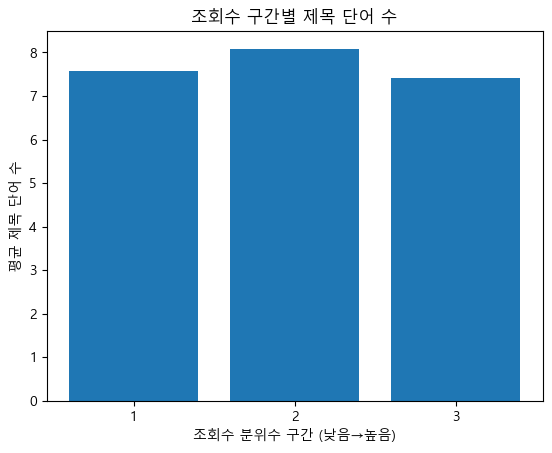

In [110]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_cnt'])
plt.xlabel('조회수 분위수 구간 (낮음→높음)')
plt.ylabel('평균 제목 단어 수')
plt.title('조회수 구간별 제목 단어 수')
plt.show()

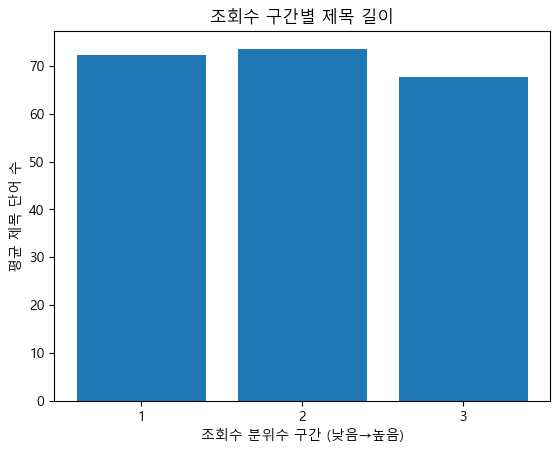

In [111]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_len'])
plt.xlabel('조회수 분위수 구간 (낮음→높음)')
plt.ylabel('평균 제목 단어 수')
plt.title('조회수 구간별 제목 길이')
plt.show()

In [65]:
# 분위수 구간별로 title_cnt 분리
group1 = df[df['views_bin'] == 1]['title_cnt']
group2 = df[df['views_bin'] == 2]['title_cnt']
group3 = df[df['views_bin'] == 3]['title_cnt']

# ANOVA 테스트
f_stat, p_val = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

NameError: name 'f_oneway' is not defined

### description과 title에 겹치는 단어 있는지 확인

In [153]:
game_df

,title,views,likes,description,log_views,log_views_scaled,cleaned_title,cleand_desc,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt,title_len,views_bin
131,L.A. Noire - Nintendo Switch Trailer,154872,7683,Amid the post-war boom of Hollywood's Golden A...,11.950361,-1.291706,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5,36,1
392,L.A. Noire - Nintendo Switch Trailer,161231,7803,Amid the post-war boom of Hollywood's Golden A...,11.990600,-1.265922,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5,36,1
405,Our First Date,224426,17784,Here's an animation short of our First Date! W...,12.321306,-1.054013,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1,14,1
619,Our First Date,463992,25840,Here's an animation short of our First Date! W...,13.047625,-0.588606,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1,14,1
652,Playing CUPHEAD with MatPat!,55460,3871,"After my appearance on GTLive, MatPat (Game Th...",10.923435,-1.949735,play cuphead matpat,appearance gtlive matpat game theory play cuph...,1,1,0,1,0,0,False,3,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40874,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",9992803,230507,Return to the Kanto region and experience a cl...,16.117376,1.378417,pokmon let pikachu pokmon let eevee trailer,return kanto region experience classic pokmon ...,2,3,0,4,0,0,True,7,65,3
40911,The Sims 4 Seasons: Official Reveal Trailer,1749832,77408,Add weather to your Sims’ lives to tell new st...,14.375031,0.261964,sims season official reveal trailer,add weather sim live tell new story enjoy seas...,3,0,1,1,0,1,True,5,43,2
40919,The History of Fortnite Battle Royale - Did Yo...,324219,7840,Thanks to Skillshare for sponsoring this video...,12.689178,-0.818290,history fortnite battle royale know game feat ...,thank skillshare sponsor video people sign lin...,4,1,1,2,0,0,True,8,72,1
40936,LIE DETECTOR TEST WITH MY GIRLFRIEND!,3229540,109945,Talia: https://www.youtube.com/user/nataliahad...,14.987851,0.654644,lie detector test girlfriend,talia httpswwwyoutubecomusernataliahaddockjosh...,4,0,0,0,0,0,False,4,37,3


In [155]:
# 겹치는 단어 탐색
game_df['common_words'] = game_df.apply(extract_common_words, axis=1)

In [156]:
# 개수까지 같이 세기
game_df['n_common_words'] = game_df['common_words'].apply(lambda x: len(x.split()) if x else 0)

In [158]:
game_df['n_common_words']

131      4
392      4
405      1
619      1
652      2
        ..
40874    4
40911    0
40919    6
40936    0
40948    4
Name: n_common_words, Length: 817, dtype: int64

In [169]:
# 조회수 구간에 따라 차이가 있는지 확인 
grouped = game_df.groupby('views_bin').agg({
    'views' : 'mean',
    'n_common_words': 'mean',
    'NOUN' : 'mean',
    'PROPN' : 'mean',
    'VERB' : 'mean',
    'INTJ' : 'mean',
    'NUM' : 'mean'
}).reset_index()

print(grouped)

  views_bin         views  n_common_words      NOUN     PROPN      VERB  INTJ  \
0         1  3.300992e+05        3.032967  2.604396  1.637363  0.769231   0.0   
1         2  1.630028e+06        2.338235  2.691176  1.073529  0.779412   0.0   
2         3  5.910787e+06        2.959559  3.474265  0.591912  0.852941   0.0   

        NUM  
0  0.472527  
1  0.352941  
2  0.312500  


C:\Users\wonny\AppData\Local\Temp\ipykernel_22328\2622363220.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = game_df.groupby('views_bin').agg({


-----------------------------------------------------------------------------------------------------------

### 최종 예측

------------------------------------------------------------------------------------------------------

키워드 사전 구축

In [112]:
# 조회수가 높은 영상에 자주 등장하는 키워드 사전 구축 
keywords = [
    "vlog", "short", "minivlog", "food", "korea", "travel", "korean", "dailyvlog",
    "day", "camping", "foodvlog", "foodie", "travelvlog", "streetfood", "daily",
    "india", "trend", "eat", "life", "challenge", "japan", "street", "trip",
    "indianfood", "train", "recipe", "asmr", "grwm", "hour", "delhi",'bushcraft', 'skill', 'survival'
]


특징 추출 함수 정의

In [113]:
def extract_features(row):
    features = {}

    # 원본 텍스트
    title = row['title'] if isinstance(row['title'], str) else ''

    # 전처리된 텍스트
    cleaned_title = preprocess_title(title)

    # 제목 길이 및 단어 수 
    features['title_len'] = len(title)
    features['title_cnt'] = len(cleaned_title.split())

    # 느낌표 / 물음표 개수
    features['num_exclamations'] = title.count('!')
    features['num_questions'] = title.count('?')

    # 숫자 포함 여부 
    features['has_number'] = int(bool(re.search(r'\d', title)))
    features['starts_with_number'] = int(bool(re.match(r'^\d', title.strip())))  

    # 키워드 포함 여부 
    keywords = [
    "vlog", "short", "minivlog", "food", "korea", "travel", "korean", "dailyvlog",
    "day", "camping", "foodvlog", "foodie", "travelvlog", "streetfood", "daily",
    "india", "trend", "eat", "life", "challenge", "japan", "street", "trip",
    "indianfood", "train", "recipe", "asmr", "grwm", "hour", "delhi",'bushcraft', 'skill', 'survival'
]
    features['has_keyword'] = int(any(word in cleaned_title for word in keywords))

    # 대문자 비율 30% 이상 여부
    features['is_caps_heavy'] = int(sum(1 for c in title if c.isupper()) > len(title) * 0.3)

    # 품사 카운트
    pos_counts = count_pos(title)
    features.update(pos_counts)

    return features


점수 계산 함수 정의

In [114]:
def compute_rule_score(features):
    score = 0

    # 1. 제목 길이: 짧을수록 가산점
    score += -0.03 * features['title_len']

    # 2. 단어 수: 
    score -= 0.3 * features['title_cnt']

    # 3. 느낌표 / 물음표 개수
    score += 0.3 * features['num_exclamations']
    score += 0.3 * features['num_questions']

    # 4. 숫자 포함 여부
    score += 0.5 * features['has_number']

    # 5. 숫자로 시작
    score -= 0.1 * features['starts_with_number']

    # 6. 키워드 포함 여부
    score += 0.8 * features['has_keyword']

    # 7. 대문자 비율이 높은 경우
    score -= 0.3 * features['is_caps_heavy']

    # 8. 품사 기반: 명사·동사 많으면 내용 풍부, 고유명사 많으면 오히려 일반성↓
    score += 0.8 * features.get('NOUN', 0)
    score += 0.5 * features.get('VERB', 0)
    score += -0.1 * features.get('PROPN', 0)  # 고유명사 많으면 가중치 낮춤

    return score

실제 적용할 데이터에서 사용할 칼럼만 불러오기

In [115]:
vlog = df[['title', 'views']].copy()

타겟 스케일링

In [116]:
# target scaling
vlog['log_views'] = np.log1p(vlog['views'])

scaler = StandardScaler()
vlog['scaled_views'] = scaler.fit_transform(vlog[['log_views']])

In [117]:
vlog = vlog.drop(columns = ['views', 'log_views'])
vlog

,title,scaled_views
0,Bhai I want to eat tasty Pizza 🤣🤣 #minivlog #a...,2.451513
1,DAILY VLOGGERS PARODY 😘 | CARRYMINATI,2.329853
2,Kylie Jenner: A Day in the Life,2.287658
3,Ghar Par Banaya Soap 🧼💀 | Mini Vlog #shorts #m...,2.479383
4,Bike Ne Aukaat Dikha Di 💀💀 #shorts #minivlog #...,2.311641
...,...,...
7851,"spend the day with me 🛀💌🪽 5am pilates class, p...",-0.747751
7852,6am law school morning routine 📖 productive da...,-0.752325
7853,A slow living vlog #dayinmylife #productivity ...,-0.682298
7854,"daily vlog🧸⭐️: productive day , makeover mac ,...",-0.762621


In [118]:
vlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7856 entries, 0 to 7855
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         7856 non-null   object 
 1   scaled_views  7856 non-null   float64
dtypes: float64(1), object(1)
memory usage: 122.9+ KB


함수 적용

In [119]:
vlog['features'] = vlog.apply(extract_features, axis=1)

In [120]:
vlog['rule_score'] = vlog['features'].apply(compute_rule_score)

### (예측 1) 지수함수로 예측

In [121]:
def score_to_views(score, base=1e5):
    return int(base * np.exp(score / 3))

In [122]:
vlog['predicted_views'] = vlog['rule_score'].apply(score_to_views)

In [123]:
vlog[['title', 'scaled_views', 'rule_score', 'predicted_views']].sort_values(by='scaled_views', ascending=False).head()

,title,scaled_views,rule_score,predicted_views
4000,Comfortable in the caravan bed on a rainy day....,2.915487,0.17,105830
500,Watch Vaishnodevi Trip Vlog on @Neelam_kukreja...,2.763638,0.97,138172
6906,Kali muskan bache dene wali hai || molly fish ...,2.725577,-3.17,34761
501,Bungee 🥱Jumping With Rope In Beautiful Place A...,2.694341,1.05,141906
5450,Every Gamer At Night,2.611291,0.40,114263


In [124]:
# 예측값을 log-scaling + standardization한 것과 맞추려면:
pred_scaled = np.log1p(vlog['predicted_views'])
pred_scaled = (pred_scaled - pred_scaled.mean()) / pred_scaled.std()

# 실제값
true_scaled = vlog['scaled_views']

In [125]:
rmse = mean_squared_error(vlog['scaled_views'], pred_scaled, squared=False)
r2 = r2_score(true_scaled, pred_scaled)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 1.4328
R²: -1.0528


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### (예측 2) Linear Regression

In [126]:
# X, y 정의
X = vlog[['rule_score']]  # 독립 변수: rule 기반 점수
y = vlog['scaled_views']  # 종속 변수: log + 표준화된 조회수

# 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 평가 지표 출력
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.9997
R²: 0.0007


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


가중치 수정을 위한 회귀계수 확인

In [127]:
# 피처 추출
features_df = vlog.apply(extract_features, axis=1, result_type='expand')

# 독립변수(X), 종속변수(y)
X = features_df.drop(columns = 'common_words', errors = 'ignore')  
y =vlog['scaled_views']

# 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 성능 평가
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

# 결과 출력
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))

# 계수 확인
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\n Feature Importance (계수):")
print(coefficients)

RMSE: 0.9896
R²: 0.0207

 Feature Importance (계수):
INTJ                 -0.175178
is_caps_heavy         0.128924
has_keyword          -0.127830
starts_with_number    0.101933
VERB                 -0.062576
title_cnt             0.038738
ADJ                  -0.030089
has_number            0.028188
PROPN                -0.020502
NOUN                 -0.018587
num_exclamations      0.015741
num_questions        -0.014264
title_len            -0.003425
NUM                  -0.002304
dtype: float64


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-----------------------------------------------------------------------------------------------------

점수 가중치 수정 후 다시 예측

In [76]:
def compute_rule_score_modified(features):
    score = 0

    # 1. 제목 길이 (계수: -0.014342 → 아주 미미한 영향)
    score -= 0.01 * features['title_len']

    # 2. 단어 수 (계수: +0.060302 → 약한 가산점)
    score += 0.06 * features['title_cnt']

    # 3. 느낌표 / 물음표 개수 (계수: -0.009336, -0.075288 → 약한 감점)
    score -= 0.01 * features['num_exclamations']
    score -= 0.08 * features['num_questions']

    # 4. 숫자 포함 여부 (계수: -0.044869 → 보통 수준의 감점)
    score -= 0.05 * features['has_number']

    # 5. 숫자로 시작 (계수: -0.150011 → 상당한 감점)
    score -= 0.15 * features['starts_with_number']

    # 6. 키워드 포함 여부 (계수: -0.305676 → 가장 큰 감점)
    score -= 0.3 * features['has_keyword']

    # 7. 대문자 비율이 높은 경우 (계수: -0.084076 → 중간 감점)
    score -= 0.08 * features['is_caps_heavy']

    # 8. 품사 기반
    score += 0.004 * features.get('NOUN', 0)      # 계수: +0.003710
    score += 0.001 * features.get('VERB', 0)      # 계수: +0.000971
    score += 0.03  * features.get('PROPN', 0)     # 계수: +0.026333 → 일반성↓로 감점
    score += 0.03  * features.get('ADJ', 0)       # 계수: +0.028304
    score -= 0.03  * features.get('NUM', 0)       # 계수: -0.031750
    score -= 0.08  * features.get('INTJ', 0)      # 계수: -0.084877

    return score


In [77]:
vlog['rule_score_modified'] = vlog['features'].apply(compute_rule_score_modified)

In [78]:
# X, y 정의
X = vlog[['rule_score_modified']]  # 독립 변수: rule 기반 점수
y = vlog['scaled_views']  # 종속 변수: log + 표준화된 조회수

# 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 평가 지표 출력
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.9996
R²: 0.0009


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
